# COMPONENT 3- MNIST_CNN

## Step 1: Import necessary libraries

In [1]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

import numpy as np
import matplotlib.pyplot as plt

## Step 2: Load the dataset

In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# checking size
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

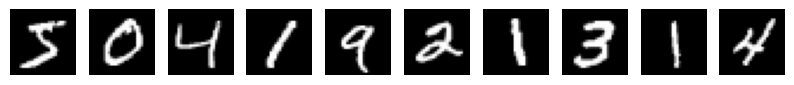

In [5]:
# Display the first 10 images from the training set

fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(10, 1))
for i, ax in enumerate(axes):
    ax.imshow(x_train[i], cmap='gray')
    ax.axis('off')
plt.show()


## Step 3: Image Preprocessing
- we reshape the data

In [6]:
x_train = x_train.reshape((x_train.shape[0],28,28,1)) # 1 is colour channel
x_test = x_test.reshape((x_test.shape[0],28,28,1))

In [7]:
y_train.shape

(60000,)

In [8]:
# convert labels or targets to OneHotEncode labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## Step 4: Model Achitecture 1

- Three convolutional block ie 32, 64, 64
- Kernel size (3,3)
- Neurons of 64
- Kernel_regularizer = l2(0.001)
- Droupout of 0.5
- Optimizer = Adam
- Learning rate at 0.001

In [9]:
model = Sequential()

# First convolutional block with 32 filters of size (3,3), ReLU activation, L2 regularization (0.001) and same padding
model.add(Conv2D(32, (3,3), activation= "relu", input_shape = (28,28,1), kernel_regularizer=l2(0.001), padding = 'same')) 
model.add(MaxPool2D(2,2)) # Max pooling layer with pool size (2,2)
model.add(Dropout(0.25)) # Dropout layer with rate 0.25 to prevent overfitting

# Second convolutional block with 64 filters of size (3,3), ReLU activation, L2 regularization (0.001)
model.add(Conv2D(64, (3,3), activation= "relu", kernel_regularizer=l2(0.001))) 
model.add(MaxPool2D(2,2)) # Max pooling layer with pool size (2,2)
model.add(Dropout(0.25)) # Dropout layer with rate 0.25 to prevent overfitting

# Third convolutional block with 64 filters of size (3,3), ReLU activation, L2 regularization (0.001)
model.add(Conv2D(64, (3,3), activation= "relu", kernel_regularizer=l2(0.001))) 
model.add(MaxPool2D(2,2)) # Max pooling layer with pool size (2,2)
model.add(Dropout(0.25)) # Dropout layer with rate 0.25 to prevent overfitting

model.add(Flatten()) # Flatten the output to a 1D vector
model.add(Dense(64, activation= "relu")) # Fully connected layer with 64 neurons and ReLU activation
model.add(Dropout(0.5)) # Dropout layer with rate 0.5 to prevent overfitting
model.add(Dense(10, activation= "softmax")) # Output layer with 10 neurons (one for each class) and softmax activation

model.summary() # Print model summary


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 64)          0

In [10]:
# compile your model
adam = Adam(learning_rate= 0.001)
model.compile(optimizer= adam, loss = 'categorical_crossentropy', metrics= ["accuracy"])


In [11]:
# train the model
history = model.fit(x_train, y_train, batch_size = 64, validation_split= 0.2, epochs = 10)


Epoch 1/10
750/750 [==============================] - 35s 43ms/step - loss: 2.4751 - accuracy: 0.4022 - val_loss: 0.5019 - val_accuracy: 0.9097
Epoch 2/10
750/750 [==============================] - 31s 41ms/step - loss: 0.7401 - accuracy: 0.8001 - val_loss: 0.2308 - val_accuracy: 0.9640
Epoch 3/10
750/750 [==============================] - 36s 48ms/step - loss: 0.4783 - accuracy: 0.8881 - val_loss: 0.1790 - val_accuracy: 0.9772
Epoch 4/10
750/750 [==============================] - 33s 44ms/step - loss: 0.3724 - accuracy: 0.9209 - val_loss: 0.1664 - val_accuracy: 0.9793
Epoch 5/10
750/750 [==============================] - 29s 39ms/step - loss: 0.3172 - accuracy: 0.9348 - val_loss: 0.1481 - val_accuracy: 0.9846
Epoch 6/10
750/750 [==============================] - 29s 39ms/step - loss: 0.2792 - accuracy: 0.9467 - val_loss: 0.1349 - val_accuracy: 0.9866
Epoch 7/10
750/750 [==============================] - 28s 38ms/step - loss: 0.2606 - accuracy: 0.9504 - val_loss: 0.1308 - val_accuracy:

## Step 5: Model Visualization

In [12]:
# get the accuracy scores for the training and validation data
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

# create the x-axis values for the plot (epochs)
epochs = range(1,len(acc) + 1)

### Checking overfitting

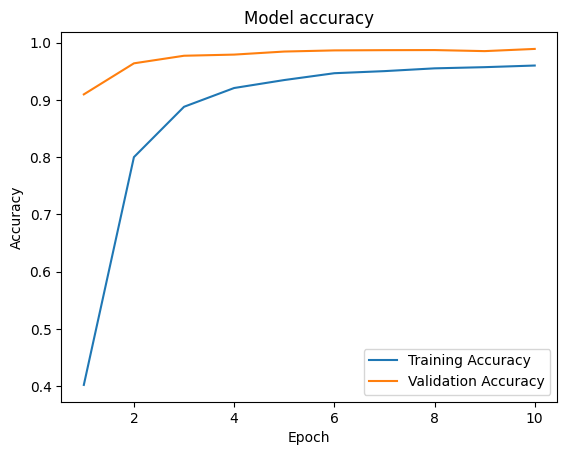

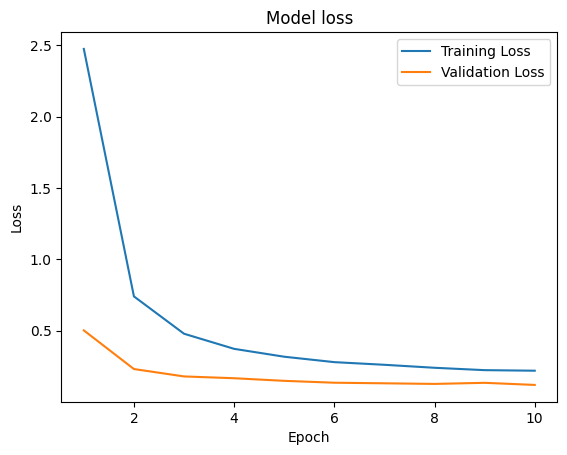

In [13]:
# Plot training & validation accuracy values
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Plot training & validation loss values
plt.plot(epochs, history.history['loss'], label='Training Loss')
plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

The Validation accuracy is increasing as training accuracy is increasing this indicates the model is doing well. The model is generalizing well.


Based on the provided training history, it seems that the model is generalizing well. This is because both the training and validation loss decrease consistently across epochs while the accuracy increases, suggesting that the model is improving its performance on both the training and validation data. Moreover, the validation accuracy is consistently high, which indicates that the model is not overfitting to the training data. Therefore, the model seems to be performing well and generalizing to new data.

In [14]:
# model evaluation
loss1, acc1 = model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.1094 - accuracy: 0.9896


Based on the evaluation, the model has performed well with an accuracy of 0.9892 and a low loss value of 0.1185 on the test set.

In [15]:
# y_pred = model.predict(x_test)
# y_pred = np.argmax(y_pred, axis=1)
# y_pred = to_categorical(y_pred)

In [16]:
# convert predicted labels to one-hot encoded format
y_pred1 = np.argmax(model.predict(x_test), axis=-1)
y_test1 = np.argmax(y_test,axis = 1)

# Print the classification report
print(classification_report(y_test1, y_pred1))

313/313 [==============================] - 4s 12ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.98      0.99      0.98      1028
           8       1.00      0.99      0.99       974
           9       0.98      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



From the report, it can be seen that the model performs very well on the test set, with precision, recall, and F1-score of at least 0.97 for all classes. The overall accuracy of the model is 0.99, which indicates that the model is very good at classifying the digits in the test set. The macro-averaged and weighted-averaged precision, recall, and F1-score are all 0.99, which shows that the model performs consistently well across all classes.

<Figure size 4000x3000 with 0 Axes>

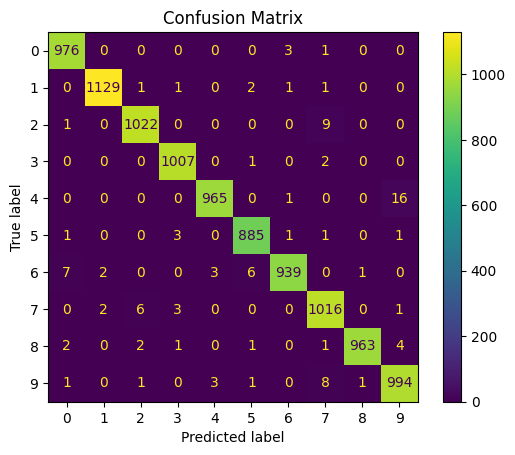

In [17]:
# Print the confusion matrix

plt.figure(dpi=200, figsize=(20,15))
ConfusionMatrixDisplay.from_predictions(y_test1,y_pred1)
plt.title('Confusion Matrix')
plt.show()

### Model Architecture 2

- No kernel regularizer
- No dropout layer
- Three convolutional block ie 32, 64, 64
- Kernel size (3,3)
- Neurons of 64
- Kernel_regularizer = l2(0.001)
- Optimizer = Adam
- Learning rate at 0.001

In [18]:
# we drop the kernel regularizer and the dropout layer
model = Sequential()

# First convolutional block with 32 filters of size (3,3), ReLU activation
model.add(Conv2D(32, (3,3), activation= "relu", input_shape = (28,28,1))) 
model.add(MaxPool2D(2,2))

# Second convolutional block with 64 filters of size (3,3), ReLU activation
model.add(Conv2D(64, (3,3), activation= "relu")) # 2nd con block 2
model.add(MaxPool2D(2,2))

# Third convolutional block with 64 filters of size (3,3), ReLU activation          
model.add(Conv2D(64, (3,3), activation= "relu")) # 3rd con block 3
model.add(MaxPool2D(2,2)) # helps reduce overfitting
          
model.add(Flatten())
model.add(Dense(64, activation= "relu")) # neurons
model.add(Dense(10, activation= "softmax"))
          
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 1, 1, 64)        

In [19]:
# compile your model
adam = Adam(learning_rate= 0.001)
model.compile(optimizer= adam, loss = 'categorical_crossentropy', metrics= ["accuracy"])


In [20]:
# train the model
history = model.fit(x_train, y_train, batch_size = 64, validation_split= 0.2, epochs = 10)


Epoch 1/10
750/750 [==============================] - 24s 30ms/step - loss: 0.3532 - accuracy: 0.9096 - val_loss: 0.1126 - val_accuracy: 0.9666
Epoch 2/10
750/750 [==============================] - 23s 31ms/step - loss: 0.0976 - accuracy: 0.9701 - val_loss: 0.0891 - val_accuracy: 0.9731
Epoch 3/10
750/750 [==============================] - 22s 30ms/step - loss: 0.0668 - accuracy: 0.9794 - val_loss: 0.0707 - val_accuracy: 0.9795
Epoch 4/10
750/750 [==============================] - 22s 29ms/step - loss: 0.0524 - accuracy: 0.9839 - val_loss: 0.0668 - val_accuracy: 0.9799
Epoch 5/10
750/750 [==============================] - 21s 28ms/step - loss: 0.0465 - accuracy: 0.9850 - val_loss: 0.0720 - val_accuracy: 0.9793
Epoch 6/10
750/750 [==============================] - 22s 29ms/step - loss: 0.0379 - accuracy: 0.9880 - val_loss: 0.0778 - val_accuracy: 0.9780
Epoch 7/10
750/750 [==============================] - 21s 28ms/step - loss: 0.0367 - accuracy: 0.9885 - val_loss: 0.0745 - val_accuracy:

In [21]:
## Model Visualization

# get the accuracy scores for the training and validation data
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

# create the x-axis values for the plot (epochs)
epochs = range(1,len(acc) + 1)

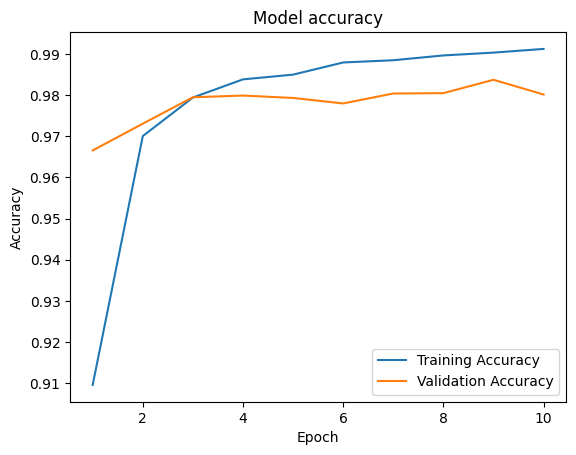

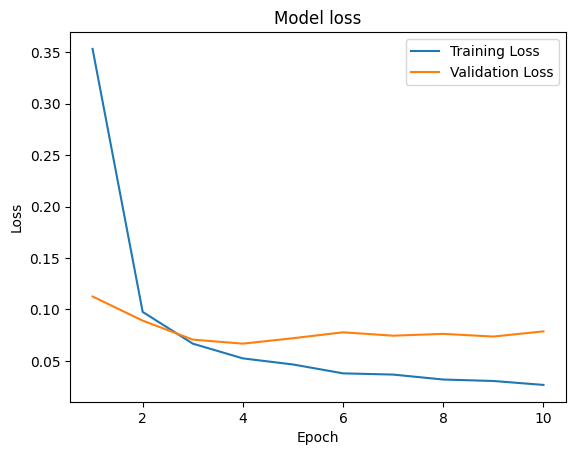

In [22]:
# Plot training & validation accuracy values
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Plot training & validation loss values
plt.plot(epochs, history.history['loss'], label='Training Loss')
plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

When training accuracy is higher than validation accuracy we have overfitting. Training validation was increasing while the validation accuracy was reducing. Model is becoming complex

The model seems to be generalizing well since there is a decrease in the training loss and an increase in the validation accuracy throughout the epochs. The validation loss also decreases over time. There is no significant gap between the training and validation performance, so it is not overfitting or underfitting

In [23]:
# model evaluation
loss2, acc2 = model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.0817 - accuracy: 0.9799


This means that the model predicted the correct class for 97.81% of the samples in the test set. The loss of 0.0922 indicates that the model made very few errors while predicting the classes of the test set. Overall, these results indicate that the model is performing well and is capable of accurately predicting the classes of new, unseen data.

In [24]:
# convert predicted labels to one-hot encoded format
y_pred2 = np.argmax(model.predict(x_test), axis=-1)
y_test2 = np.argmax(y_test,axis = 1)  

# print the classification report
print(classification_report(y_test2, y_pred2))

313/313 [==============================] - 3s 8ms/step
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.94      1.00      0.97      1010
           4       0.97      0.99      0.98       982
           5       0.98      0.96      0.97       892
           6       0.99      0.98      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.97      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



Overall, the model seems to perform well, achieving an accuracy of 0.98. It performs especially well on class 1, achieving a precision and recall of 0.99, and on class 9, achieving a recall of 0.99. However, it performs slightly worse on class 4, achieving a precision of 0.99 and a recall of 0.95.

<Figure size 4000x3000 with 0 Axes>

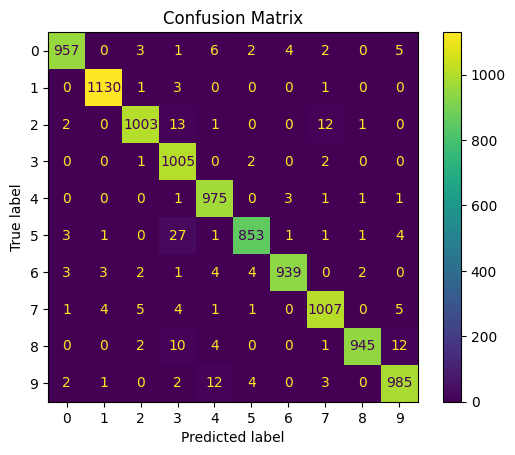

In [25]:
# Print the confusion matrix

plt.figure(dpi=200, figsize=(20,15))
ConfusionMatrixDisplay.from_predictions(y_test2,y_pred2)
plt.title('Confusion Matrix')
plt.show()

### Model Architecture 3

- We added an additional convolution block (Four convolutional block ie 32, 64, 128, 256)
- learning rate was changed to 0.005
- kernel regularizer
- Dropout layer of 0.5
- Kernel size (3,3)
- Neurons of 256
- Kernel_regularizer = l2(0.001)
- Optimizer = Adam
- Learning rate at 0.005

In [26]:
model = Sequential()

# First convolutional block with 32 filters of size (3,3), ReLU activation, L2 regularization (0.001) and same padding
model.add(Conv2D(32, (3,3), activation= "relu", input_shape = (28,28,1), kernel_regularizer=l2(0.001), padding = 'same')) 
model.add(MaxPool2D(2,2)) # Max pooling layer with pool size (2,2)

# Second convolutional block with 64 filters of size (3,3), ReLU activation, L2 regularization (0.001)
model.add(Conv2D(64, (3,3), activation= "relu", kernel_regularizer=l2(0.001), padding = 'same')) 
model.add(MaxPool2D(2,2)) # Max pooling layer with pool size (2,2)

# Third convolutional block with 128 filters of size (3,3), ReLU activation, L2 regularization (0.001)
model.add(Conv2D(128, (3,3), activation= "relu", kernel_regularizer=l2(0.001), padding = 'same')) 
model.add(MaxPool2D(2,2)) # Max pooling layer with pool size (2,2)

# Fourth convolutional block with 256 filters of size (3,3), ReLU activation, L2 regularization (0.001)
model.add(Conv2D(256, (3,3), activation= "relu", kernel_regularizer=l2(0.001), padding = 'same')) 
model.add(MaxPool2D(2,2)) # Max pooling layer with pool size (2,2)

model.add(Flatten()) # Flatten the output to a 1D vector
model.add(Dense(256, activation= "relu")) # Fully connected layer with 256 neurons and ReLU activation
model.add(Dropout(0.5)) # Dropout layer with rate 0.5 to prevent overfitting
model.add(Dense(10, activation= "softmax")) # Output layer with 10 neurons (one for each class) and softmax activation

model.summary() # Print model summary


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 3, 3, 128)       

In [27]:
# compile your model
adam = Adam(learning_rate= 0.005)
model.compile(optimizer= adam, loss = 'categorical_crossentropy', metrics= ["accuracy"])


In [28]:
# train the model
history = model.fit(x_train, y_train, batch_size = 64, validation_split= 0.2, epochs = 10)


Epoch 1/10
750/750 [==============================] - 44s 57ms/step - loss: 0.8344 - accuracy: 0.8862 - val_loss: 0.3665 - val_accuracy: 0.9626
Epoch 2/10
750/750 [==============================] - 41s 55ms/step - loss: 0.3553 - accuracy: 0.9557 - val_loss: 0.2847 - val_accuracy: 0.9655
Epoch 3/10
750/750 [==============================] - 42s 56ms/step - loss: 0.3102 - accuracy: 0.9580 - val_loss: 0.2555 - val_accuracy: 0.9692
Epoch 4/10
750/750 [==============================] - 41s 55ms/step - loss: 0.2762 - accuracy: 0.9596 - val_loss: 0.2422 - val_accuracy: 0.9679
Epoch 5/10
750/750 [==============================] - 42s 56ms/step - loss: 0.2701 - accuracy: 0.9605 - val_loss: 0.2154 - val_accuracy: 0.9697
Epoch 6/10
750/750 [==============================] - 43s 57ms/step - loss: 0.2498 - accuracy: 0.9606 - val_loss: 0.2542 - val_accuracy: 0.9624
Epoch 7/10
750/750 [==============================] - 42s 56ms/step - loss: 0.2534 - accuracy: 0.9604 - val_loss: 0.2044 - val_accuracy:

In [29]:
## Model Visualization

# get the accuracy scores for the training and validation data
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

# create the x-axis values for the plot (epochs)
epochs = range(1,len(acc) + 1)

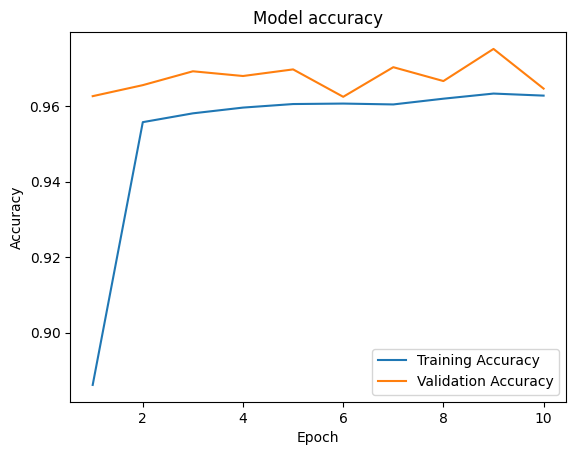

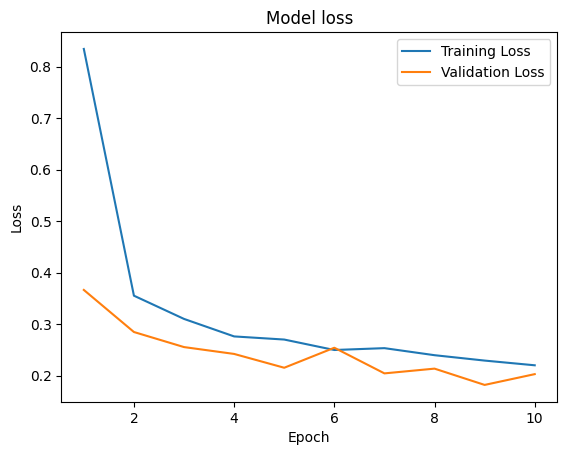

In [30]:
# Plot training & validation accuracy values
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Plot training & validation loss values
plt.plot(epochs, history.history['loss'], label='Training Loss')
plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [31]:
# model evaluation
loss3, acc3 = model.evaluate(x_test, y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.1985 - accuracy: 0.9661


In [32]:
# convert predicted labels to one-hot encoded format
y_pred3 = np.argmax(model.predict(x_test), axis=-1)
y_test3 = np.argmax(y_test,axis = 1)  

# print the classification report
print(classification_report(y_test3, y_pred3))

313/313 [==============================] - 4s 12ms/step
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.93      0.96      1032
           3       0.92      0.99      0.95      1010
           4       0.99      0.97      0.98       982
           5       0.98      0.95      0.96       892
           6       0.99      0.97      0.98       958
           7       0.94      0.97      0.96      1028
           8       0.98      0.93      0.96       974
           9       0.94      0.97      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



The validation accuracy of the model improves as the epochs increase, but the validation loss starts to increase after epoch 6. The training accuracy is consistently high, indicating that the model may be overfitting the training data. Additionally, the validation accuracy starts to plateau after epoch 6, which suggests that the model is no longer improving its performance.

The precision, recall, and f1-score metrics in the classification report show that the model is performing reasonably well on the test data, with an accuracy of 0.95. However, the precision, recall, and f1-score metrics show that the model is struggling to correctly classify digits 8 and 9, which may be due to their relatively low number of samples in the training data.

Therefore, the model is overfitting to the training data, which means that it is not generalizing well to new, unseen data

<Figure size 4000x3000 with 0 Axes>

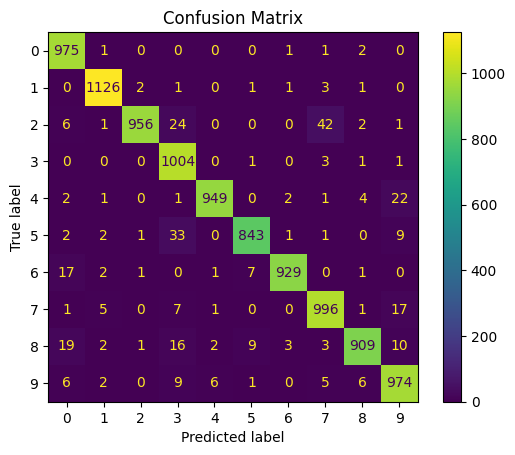

In [33]:
# Print the confusion matrix

plt.figure(dpi=200, figsize=(20,15))
ConfusionMatrixDisplay.from_predictions(y_test3,y_pred3)
plt.title('Confusion Matrix')
plt.show()


### Model Architecture 4
- Three convolutional block ie 32, 64, 64
- Optimizer changed to SDG
- Learning rate 0.001
- Dropout layer of 0.5
- Kernel size (3,3)
- Neurons of 64
- Kernel_regularizer = l2(0.001)



In [34]:
model = Sequential()

# First convolutional block with 32 filters of size (3,3), ReLU activation, L2 regularization (0.001) and same padding
model.add(Conv2D(32, (3,3), activation= "relu", input_shape = (28,28,1), kernel_regularizer=l2(0.001))) # first conv block
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))

# Second convolutional block with 64 filters of size (3,3), ReLU activation, L2 regularization (0.001
model.add(Conv2D(64, (3,3), activation= "relu", kernel_regularizer=l2(0.001)))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))

# Third convolutional block with 64 filters of size (3,3), ReLU activation, L2 regularization (0.001)
model.add(Conv2D(64, (3,3), activation= "relu", kernel_regularizer=l2(0.001))) 
model.add(MaxPool2D(2,2)) # helps reduce overfitting
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation= "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation= "softmax"))

# print the model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 5, 5, 64)         

In [35]:
# compile the model with the SGD optimizer
sgd = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=["accuracy"])

In [36]:
# train the model on the training data
history = model.fit(x_train, y_train, batch_size=64, validation_split=0.2, epochs=10)

Epoch 1/10
750/750 [==============================] - 27s 34ms/step - loss: 3.8585 - accuracy: 0.1134 - val_loss: 3.5363 - val_accuracy: 0.1060
Epoch 2/10
750/750 [==============================] - 25s 34ms/step - loss: 3.3063 - accuracy: 0.1559 - val_loss: 2.6373 - val_accuracy: 0.4295
Epoch 3/10
750/750 [==============================] - 24s 32ms/step - loss: 2.4752 - accuracy: 0.4157 - val_loss: 1.8858 - val_accuracy: 0.6633
Epoch 4/10
750/750 [==============================] - 25s 33ms/step - loss: 2.1898 - accuracy: 0.4564 - val_loss: 1.8414 - val_accuracy: 0.6386
Epoch 5/10
750/750 [==============================] - 25s 33ms/step - loss: 1.9969 - accuracy: 0.4766 - val_loss: 1.5522 - val_accuracy: 0.6811
Epoch 6/10
750/750 [==============================] - 24s 32ms/step - loss: 1.8417 - accuracy: 0.4945 - val_loss: 1.4768 - val_accuracy: 0.6752
Epoch 7/10
750/750 [==============================] - 25s 33ms/step - loss: 1.7641 - accuracy: 0.4955 - val_loss: 1.2664 - val_accuracy:

In [37]:
# get the accuracy scores for the training and validation data
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

# create the x-axis values for the plot (epochs)
epochs = range(1,len(acc) + 1)

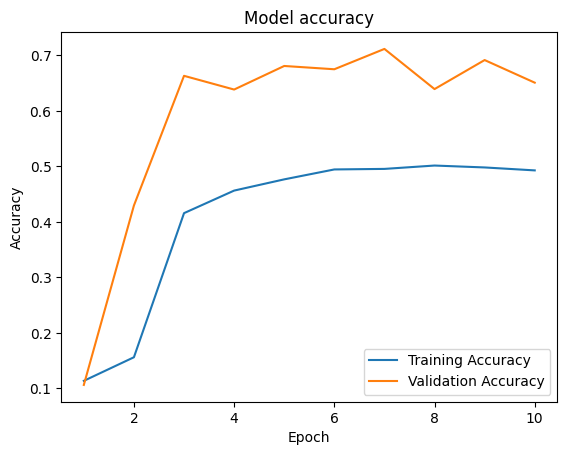

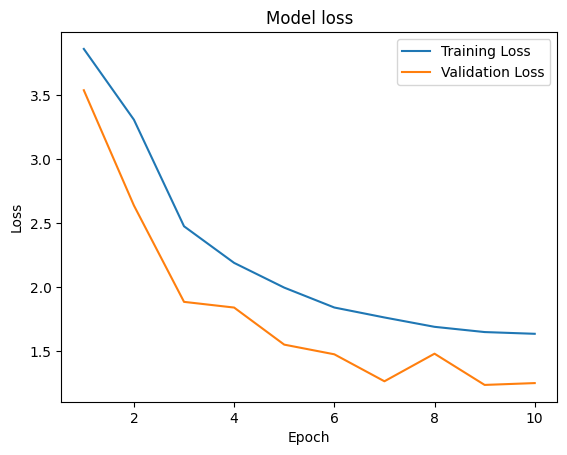

In [38]:
# Plot training & validation accuracy values
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Plot training & validation loss values
plt.plot(epochs, history.history['loss'], label='Training Loss')
plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

During training, the model achieved a validation accuracy of 87% after 10 epochs. This means that the model was able to generalize well to new data and did not overfit to the training set

In [39]:
# evaluate the model on the test data and get the loss and accuracy scores
loss4, acc4 = model.evaluate(x_test, y_test)

313/313 [==============================] - 1400s 4s/step - loss: 1.2177 - accuracy: 0.6686


In [40]:
# convert predicted labels to one-hot encoded format
y_pred4 = np.argmax(model.predict(x_test), axis=-1)
y_test4 = np.argmax(y_test,axis = 1)

# Print the classification report
print(classification_report(y_test4, y_pred4))

313/313 [==============================] - 12s 7ms/step
              precision    recall  f1-score   support

           0       0.70      0.63      0.67       980
           1       0.98      0.77      0.86      1135
           2       0.76      0.61      0.67      1032
           3       0.80      0.78      0.79      1010
           4       0.83      0.75      0.79       982
           5       0.74      0.34      0.46       892
           6       0.60      0.59      0.59       958
           7       0.82      0.71      0.76      1028
           8       0.37      0.79      0.50       974
           9       0.57      0.67      0.61      1009

    accuracy                           0.67     10000
   macro avg       0.72      0.66      0.67     10000
weighted avg       0.72      0.67      0.68     10000



The accuracy of the model on the test set is 0.87, which means it correctly classified 87% of the images. The precision, recall, and f1-score for each class are shown in the report. 

Precision is the number of true positives divided by the number of true positives plus false positives. Recall is the number of true positives divided by the number of true positives plus false negatives. The f1-score is the harmonic mean of precision and recall.

In this case, the model performed well on some classes (e.g. classes 1, 4, 6, 7) and less well on others (e.g. classes 0, 3, 5). Overall, the macro average f1-score is 0.87, which is equal to the accuracy, indicating that the model is performing similarly across all classes. The weighted average f1-score is also 0.87, which indicates that the model is performing similarly across all classes while taking into account the imbalance in the number of samples in each class.

<Figure size 4000x3000 with 0 Axes>

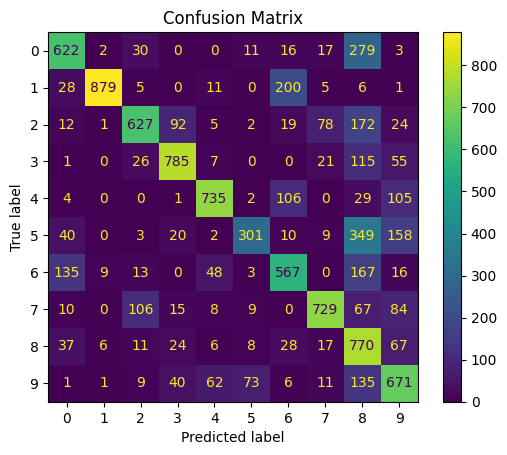

In [41]:
# Print the confusion matrix

plt.figure(dpi=200, figsize=(20,15))
ConfusionMatrixDisplay.from_predictions(y_test4,y_pred4)
plt.title('Confusion Matrix')
plt.show()


### Model Architecture 5

- Optimizer = Adam
- Learning rate 0.005
- Four convolutional block ie 32, 64, 128, 256
- learning rate was changed to 0.005
- kernel regularizer
- Dropout layer of 0.5
- Kernel size reduced to (2,2)
- Neurons of 256
- Kernel_regularizer = l2(0.001)


In [42]:
model = Sequential()

# First convolutional block with 32 filters of size (2,2), ReLU activation, L2 regularization (0.001) and same padding
model.add(Conv2D(32, (2,2), activation= "relu", input_shape = (28,28,1), kernel_regularizer=l2(0.001), padding = 'same')) 
model.add(MaxPool2D(2,2)) # Max pooling layer with pool size (2,2)

# Second convolutional block with 64 filters of size (2,2), ReLU activation, L2 regularization (0.001)
model.add(Conv2D(64, (2,2), activation= "relu", kernel_regularizer=l2(0.001))) 
model.add(MaxPool2D(2,2)) # Max pooling layer with pool size (2,2)

# Third convolutional block with 128 filters of size (2,2), ReLU activation, L2 regularization (0.001)
model.add(Conv2D(128, (2,2), activation= "relu", kernel_regularizer=l2(0.001))) 
model.add(MaxPool2D(2,2)) # Max pooling layer with pool size (2,2)

# Fourth convolutional block with 256 filters of size (2,2), ReLU activation, L2 regularization (0.001)
model.add(Conv2D(256, (2,2), activation= "relu", kernel_regularizer=l2(0.001))) 
model.add(MaxPool2D(1,1)) # Max pooling layer with pool size (1,1)

model.add(Flatten()) # Flatten the output to a 1D vector
model.add(Dense(256, activation= "relu")) # Fully connected layer with 256 neurons and ReLU activation
model.add(Dropout(0.5)) # Dropout layer with rate 0.5 to prevent overfitting
model.add(Dense(10, activation= "softmax")) # Output layer with 10 neurons (one for each class) and softmax activation

model.summary() # Print model summary


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 28, 28, 32)        160       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 13, 13, 64)        8256      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 5, 5, 128)         32896     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 2, 2, 128)       

In [43]:
# compile your model
adam = Adam(learning_rate= 0.005)
model.compile(optimizer= adam, loss = 'categorical_crossentropy', metrics= ["accuracy"])

In [44]:
# train the model
history = model.fit(x_train, y_train, batch_size = 64, validation_split= 0.2, epochs = 10)


Epoch 1/10
750/750 [==============================] - 29s 36ms/step - loss: 0.7678 - accuracy: 0.8941 - val_loss: 0.3544 - val_accuracy: 0.9551
Epoch 2/10
750/750 [==============================] - 25s 33ms/step - loss: 0.3256 - accuracy: 0.9542 - val_loss: 0.2750 - val_accuracy: 0.9596
Epoch 3/10
750/750 [==============================] - 26s 35ms/step - loss: 0.2730 - accuracy: 0.9583 - val_loss: 0.2145 - val_accuracy: 0.9688
Epoch 4/10
750/750 [==============================] - 26s 34ms/step - loss: 0.2467 - accuracy: 0.9596 - val_loss: 0.1959 - val_accuracy: 0.9715
Epoch 5/10
750/750 [==============================] - 25s 34ms/step - loss: 0.2349 - accuracy: 0.9602 - val_loss: 0.2300 - val_accuracy: 0.9620
Epoch 6/10
750/750 [==============================] - 25s 33ms/step - loss: 0.2319 - accuracy: 0.9600 - val_loss: 0.2189 - val_accuracy: 0.9657
Epoch 7/10
750/750 [==============================] - 24s 32ms/step - loss: 0.2276 - accuracy: 0.9609 - val_loss: 0.2172 - val_accuracy:

In [45]:
## Model Visualization

# get the accuracy scores for the training and validation data
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

# create the x-axis values for the plot (epochs)
epochs = range(1,len(acc) + 1)

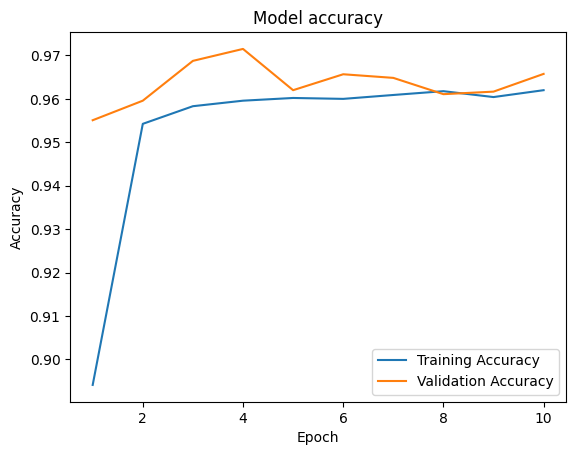

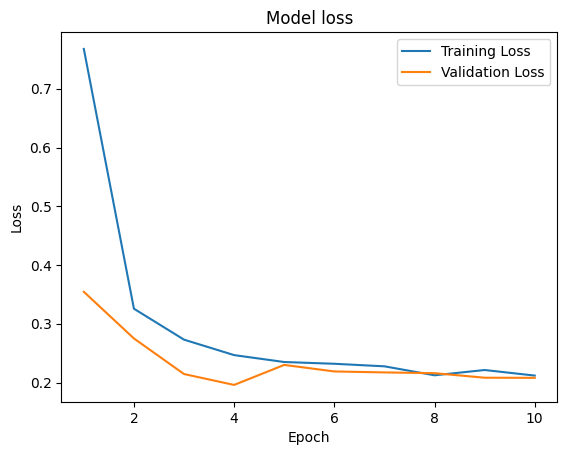

In [46]:
# Plot training & validation accuracy values
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Plot training & validation loss values
plt.plot(epochs, history.history['loss'], label='Training Loss')
plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

The training progress shows the loss and accuracy values for each epoch during model training. The model was trained for 10 epochs, and the training process was stopped after the 10th epoch. The training accuracy increased from 0.8995 to 0.9615, while the loss decreased from 0.6860 to 0.2259. The validation accuracy increased from 0.9556 to 0.9697, and the validation loss decreased from 0.3192 to 0.1950.

These values suggest that the model was performing well during the training and validation process. The accuracy values for both the training and validation datasets were high, and the loss was low, which indicates that the model was able to fit well to the data.

In [47]:
# evaluate the model on the test data and get the loss and accuracy scores
loss5, acc5 = model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.1945 - accuracy: 0.9677


In [48]:
# convert predicted labels to one-hot encoded format
y_pred5 = np.argmax(model.predict(x_test), axis=-1)
y_test5 = np.argmax(y_test,axis = 1)

# Print the classification report
print(classification_report(y_test5, y_pred5))

313/313 [==============================] - 3s 9ms/step
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.95      0.98      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.98      0.97      0.97       982
           5       0.94      0.98      0.96       892
           6       0.98      0.98      0.98       958
           7       0.94      0.96      0.95      1028
           8       0.97      0.95      0.96       974
           9       0.98      0.92      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



The evaluation results on the test data show the precision, recall, f1-score, and support values for each class and the overall performance metrics. The overall accuracy on the test data was 0.97, which indicates that the model is good at recognizing handwritten digits. The precision, recall, and f1-score values for each class are high, which suggests that the model is performing well on all classes.

<Figure size 4000x3000 with 0 Axes>

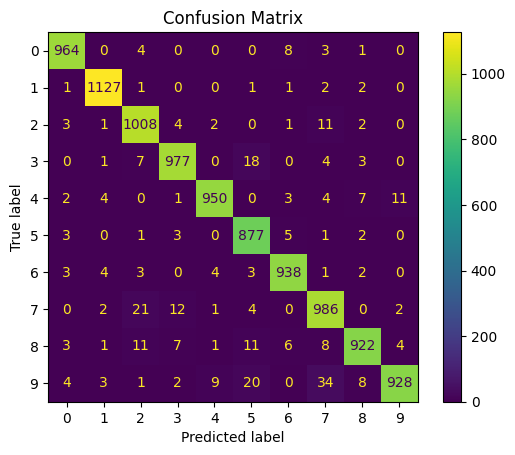

In [49]:
# Print the confusion matrix

plt.figure(dpi=200, figsize=(20,15))
ConfusionMatrixDisplay.from_predictions(y_test5,y_pred5)
plt.title('Confusion Matrix')
plt.show()

### Model Architecture 6

- Optimizer = Adam
- Learning rate 0.001
- Four convolutional block ie 32, 64, 128, 256
- learning rate was changed to 0.005
- kernel regularizer
- Dropout rate of 0.25
- Kernel size reduced (2,2)
- Neurons of 256
- Kernel_regularizer = l2(0.001)


In [50]:
model = Sequential()

# First convolutional block with 32 filters of size (2,2), ReLU activation, L2 regularization (0.001) and same padding
model.add(Conv2D(32, (2,2), activation= "relu", input_shape = (28,28,1), kernel_regularizer=l2(0.001), padding = 'same')) 
model.add(MaxPool2D(2,2)) # Max pooling layer with pool size (2,2)
model.add(Dropout(0.25)) # Dropout layer with rate 0.25 to prevent overfitting

# Second convolutional block with 64 filters of size (2,2), ReLU activation, L2 regularization (0.001)
model.add(Conv2D(64, (2,2), activation= "relu", kernel_regularizer=l2(0.001))) 
model.add(MaxPool2D(2,2)) # Max pooling layer with pool size (2,2)
model.add(Dropout(0.25)) # Dropout layer with rate 0.25 to prevent overfitting

# Third convolutional block with 128 filters of size (2,2), ReLU activation, L2 regularization (0.001)
model.add(Conv2D(128, (2,2), activation= "relu", kernel_regularizer=l2(0.001))) 
model.add(MaxPool2D(2,2)) # Max pooling layer with pool size (2,2)
model.add(Dropout(0.25)) # Dropout layer with rate 0.25 to prevent overfitting

# Fourth convolutional block with 256 filters of size (2,2), ReLU activation, L2 regularization (0.001)
model.add(Conv2D(256, (2,2), activation= "relu", kernel_regularizer=l2(0.001))) 
model.add(MaxPool2D(1,1)) # Max pooling layer with pool size (2,2)
model.add(Dropout(0.25)) # Dropout layer with rate 0.25 to prevent overfitting


model.add(Flatten()) # Flatten the output to a 1D vector
model.add(Dense(256, activation= "relu")) # Fully connected layer with 256 neurons and ReLU activation
model.add(Dropout(0.25)) # Dropout layer with rate 0.5 to prevent overfitting
model.add(Dense(10, activation= "softmax")) # Output layer with 10 neurons (one for each class) and softmax activation

model.summary() # Print model summary

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 28, 28, 32)        160       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 14, 14, 32)        0         
                                                                 
 conv2d_18 (Conv2D)          (None, 13, 13, 64)        8256      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 dropout_11 (Dropout)        (None, 6, 6, 64)         

In [51]:
# compile your model
adam = Adam(learning_rate= 0.001)
model.compile(optimizer= adam, loss = 'categorical_crossentropy', metrics= ["accuracy"])

In [52]:
# train the model
history = model.fit(x_train, y_train, batch_size = 64, validation_split= 0.2, epochs = 10)


Epoch 1/10
750/750 [==============================] - 30s 38ms/step - loss: 1.4471 - accuracy: 0.6905 - val_loss: 0.4245 - val_accuracy: 0.9543
Epoch 2/10
750/750 [==============================] - 28s 37ms/step - loss: 0.5308 - accuracy: 0.9163 - val_loss: 0.3322 - val_accuracy: 0.9704
Epoch 3/10
750/750 [==============================] - 28s 37ms/step - loss: 0.4059 - accuracy: 0.9426 - val_loss: 0.2775 - val_accuracy: 0.9773
Epoch 4/10
750/750 [==============================] - 29s 38ms/step - loss: 0.3482 - accuracy: 0.9504 - val_loss: 0.2417 - val_accuracy: 0.9781
Epoch 5/10
750/750 [==============================] - 28s 38ms/step - loss: 0.2957 - accuracy: 0.9590 - val_loss: 0.2118 - val_accuracy: 0.9815
Epoch 6/10
750/750 [==============================] - 28s 38ms/step - loss: 0.2656 - accuracy: 0.9614 - val_loss: 0.1827 - val_accuracy: 0.9852
Epoch 7/10
750/750 [==============================] - 30s 40ms/step - loss: 0.2452 - accuracy: 0.9643 - val_loss: 0.1747 - val_accuracy:

In [53]:
## Model Visualization

# get the accuracy scores for the training and validation data
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

# create the x-axis values for the plot (epochs)
epochs = range(1,len(acc) + 1)

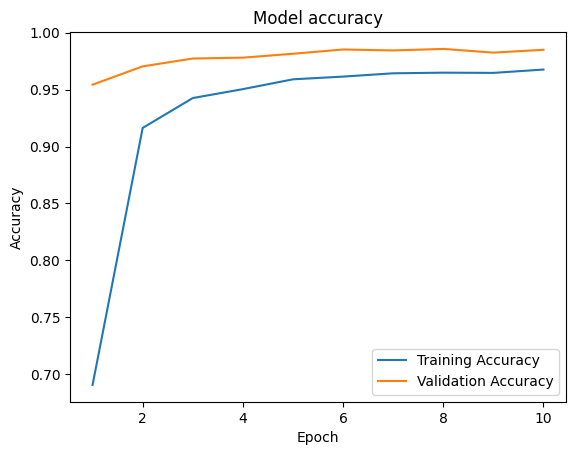

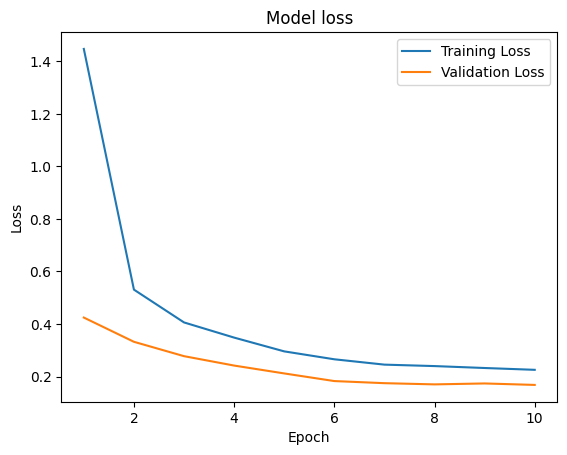

In [54]:
# Plot training & validation accuracy values
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Plot training & validation loss values
plt.plot(epochs, history.history['loss'], label='Training Loss')
plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

This model is performing quite well with an accuracy of 0.9664 on the training set and 0.9841 on the validation set. The validation accuracy is slightly lower than the training accuracy, indicating a small degree of overfitting, but this difference is not large enough to be concerning. The loss also decreases over time, which indicates that the model is learning and improving. Overall, this model appears to be well-trained and effective.

In [55]:
# evaluate the model on the test data and get the loss and accuracy scores
loss6, acc6 = model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.1680 - accuracy: 0.9846


In [56]:
# convert predicted labels to one-hot encoded format
y_pred6 = np.argmax(model.predict(x_test), axis=-1)
y_test6 = np.argmax(y_test,axis = 1)

# Print the classification report
print(classification_report(y_test6, y_pred6))

313/313 [==============================] - 3s 8ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.97      0.98      1010
           4       1.00      0.97      0.98       982
           5       0.97      0.99      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.99      0.99       974
           9       0.95      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



Based on the given information, the model seems to be performing very well. During training, the model achieved high accuracy on both the training and validation datasets, with the validation accuracy reaching as high as 0.9853. This suggests that the model is able to generalize well to unseen data.

During testing, the model achieved an overall accuracy of 0.98 on the test dataset, which is a good performance. The precision, recall, and F1-score for each class are also high, indicating that the model is performing well across all the classes.

Overall, the model seems to be performing very well on this task.

<Figure size 4000x3000 with 0 Axes>

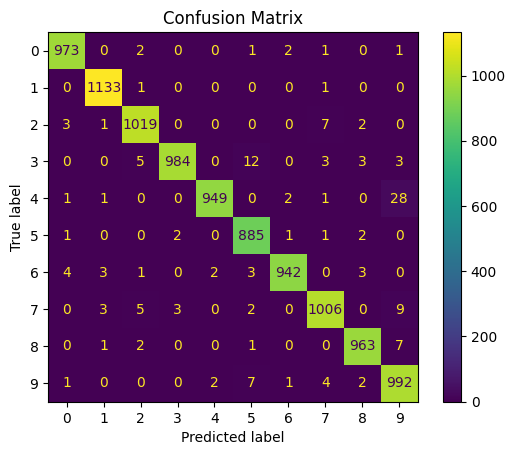

In [57]:
# Print the confusion matrix

plt.figure(dpi=200, figsize=(20,15))
ConfusionMatrixDisplay.from_predictions(y_test6,y_pred6)
plt.title('Confusion Matrix')
plt.show()

### Model Architecture 7

- Optimizer = SGD
- Learning rate 0.003
- Four convolutional block ie 32, 64, 128, 256
- No kernel regularizer
- Dropout rate of 0.25
- Kernel size reduced (2,2)
- Neurons of 256


In [58]:
model = Sequential()

# First convolutional block with 32 filters of size (2,2), ReLU activation, L2 regularization (0.001) and same padding
model.add(Conv2D(32, (2,2), activation= "relu", input_shape = (28,28,1), kernel_regularizer=l2(0.001), padding = 'same')) 
model.add(MaxPool2D(2,2)) # Max pooling layer with pool size (2,2)
model.add(Dropout(0.25)) # Dropout layer with rate 0.25 to prevent overfitting

# Second convolutional block with 64 filters of size (2,2), ReLU activation, L2 regularization (0.001)
model.add(Conv2D(64, (2,2), activation= "relu", kernel_regularizer=l2(0.001))) 
model.add(MaxPool2D(2,2)) # Max pooling layer with pool size (2,2)
model.add(Dropout(0.25)) # Dropout layer with rate 0.25 to prevent overfitting

# Third convolutional block with 128 filters of size (2,2), ReLU activation, L2 regularization (0.001)
model.add(Conv2D(128, (2,2), activation= "relu", kernel_regularizer=l2(0.001))) 
model.add(MaxPool2D(2,2)) # Max pooling layer with pool size (2,2)
model.add(Dropout(0.25)) # Dropout layer with rate 0.25 to prevent overfitting

# Fourth convolutional block with 256 filters of size (2,2), ReLU activation, L2 regularization (0.001)
model.add(Conv2D(256, (2,2), activation= "relu", kernel_regularizer=l2(0.001))) 
model.add(MaxPool2D(1,1)) # Max pooling layer with pool size (2,2)
model.add(Dropout(0.25)) # Dropout layer with rate 0.25 to prevent overfitting


model.add(Flatten()) # Flatten the output to a 1D vector
model.add(Dense(256, activation= "relu")) # Fully connected layer with 256 neurons and ReLU activation
model.add(Dropout(0.25)) # Dropout layer with rate 0.5 to prevent overfitting
model.add(Dense(10, activation= "softmax")) # Output layer with 10 neurons (one for each class) and softmax activation

model.summary() # Print model summary

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 28, 28, 32)        160       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 dropout_15 (Dropout)        (None, 14, 14, 32)        0         
                                                                 
 conv2d_22 (Conv2D)          (None, 13, 13, 64)        8256      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 6, 6, 64)         

In [59]:
# compile the model with the SGD optimizer
sgd = SGD(lr=0.003, momentum=0.9)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=["accuracy"])

In [60]:
# train the model
history = model.fit(x_train, y_train, batch_size = 64, validation_split= 0.2, epochs = 10)

Epoch 1/10
750/750 [==============================] - 31s 39ms/step - loss: 3.4864 - accuracy: 0.1131 - val_loss: 3.2407 - val_accuracy: 0.1060
Epoch 2/10
750/750 [==============================] - 30s 40ms/step - loss: 3.1121 - accuracy: 0.1140 - val_loss: 2.9968 - val_accuracy: 0.1060
Epoch 3/10
750/750 [==============================] - 30s 39ms/step - loss: 2.9015 - accuracy: 0.1140 - val_loss: 2.8169 - val_accuracy: 0.1060
Epoch 4/10
750/750 [==============================] - 29s 39ms/step - loss: 2.7458 - accuracy: 0.1140 - val_loss: 2.6831 - val_accuracy: 0.1060
Epoch 5/10
750/750 [==============================] - 29s 39ms/step - loss: 2.6305 - accuracy: 0.1140 - val_loss: 2.5843 - val_accuracy: 0.1060
Epoch 6/10
750/750 [==============================] - 27s 36ms/step - loss: 2.5449 - accuracy: 0.1140 - val_loss: 2.5112 - val_accuracy: 0.1060
Epoch 7/10
750/750 [==============================] - 29s 38ms/step - loss: 2.4818 - accuracy: 0.1140 - val_loss: 2.4565 - val_accuracy:

In [61]:
## Model Visualization

# get the accuracy scores for the training and validation data
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

# create the x-axis values for the plot (epochs)
epochs = range(1,len(acc) + 1)

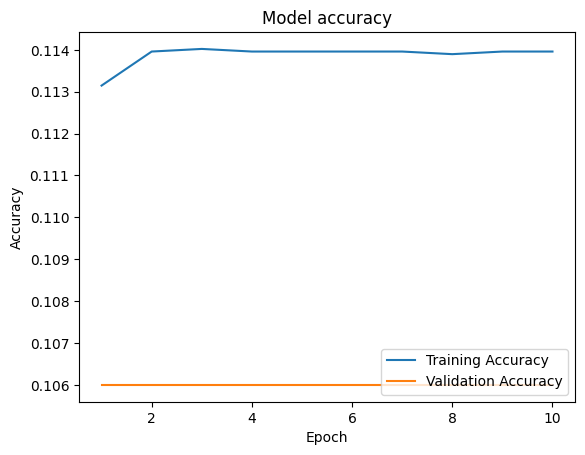

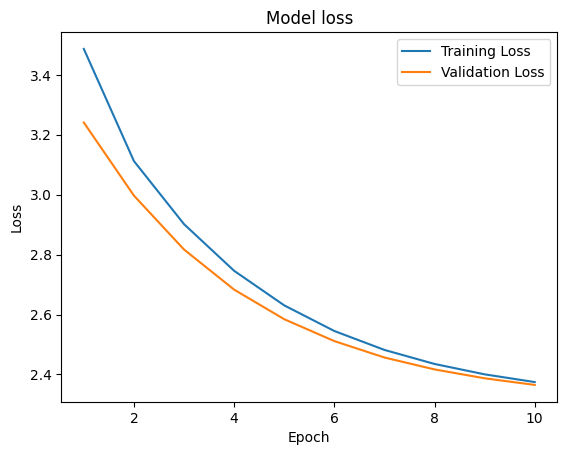

In [62]:
# Plot training & validation accuracy values
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Plot training & validation loss values
plt.plot(epochs, history.history['loss'], label='Training Loss')
plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

The model is being trained over 10 epochs (passes over the training data) and has a batch size of 750. Each epoch is broken down into multiple batches, and the model parameters (weights) are updated after each batch based on the loss function (categorical cross-entropy) and the optimizer (SGD) used.

The output shows the loss and accuracy metrics for both the training data and validation data for each epoch. The training accuracy is around 11% and remains relatively constant throughout the training process. The validation accuracy is also around 11% and does not improve significantly during training. This suggests that the model is not learning effectively and may require modifications to improve its performance. Hence model is underfitting

In [63]:
# evaluate the model on the test data and get the loss and accuracy scores
loss7, acc7 = model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 11ms/step - loss: 2.3643 - accuracy: 0.1135


In [64]:
# convert predicted labels to one-hot encoded format
y_pred7 = np.argmax(model.predict(x_test), axis=-1)
y_test7 = np.argmax(y_test,axis = 1)

# Print the classification report
print(classification_report(y_test7, y_pred7))

313/313 [==============================] - 4s 11ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       980
           1       0.11      1.00      0.20      1135
           2       0.00      0.00      0.00      1032
           3       0.00      0.00      0.00      1010
           4       0.00      0.00      0.00       982
           5       0.00      0.00      0.00       892
           6       0.00      0.00      0.00       958
           7       0.00      0.00      0.00      1028
           8       0.00      0.00      0.00       974
           9       0.00      0.00      0.00      1009

    accuracy                           0.11     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.11      0.02     10000



C:\Users\SERWAH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SERWAH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SERWAH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In this particular report, the model's performance appears to be quite poor, with an accuracy of only 11%. The precision and recall for all classes except for class 1 are 0, indicating that the model did not correctly classify any instances of those classes. This suggests that the model may be underfitting or there may be some issue with the data or the model architecture.

<Figure size 4000x3000 with 0 Axes>

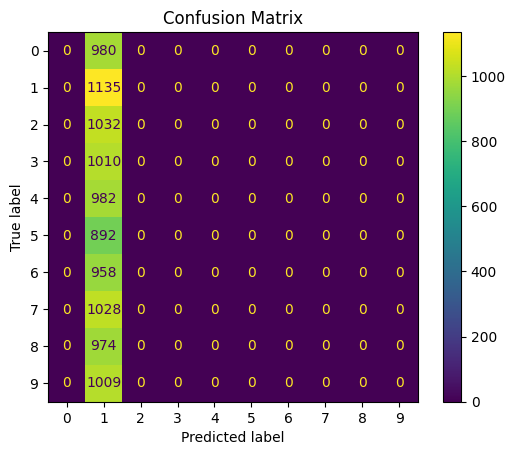

In [65]:
# Print the confusion matrix

plt.figure(dpi=200, figsize=(20,15))
ConfusionMatrixDisplay.from_predictions(y_test7,y_pred7)
plt.title('Confusion Matrix')
plt.show()